# Regression using Neural Network

## Creating data

In [1]:
import numpy as np
from sklearn.datasets import make_regression


In [2]:
data=make_regression(n_samples=1000,n_features=5,noise=.2,random_state=42)

In [3]:
X=data[0]
y=data[1]

In [4]:
X[0]

array([ 2.05654356,  0.60685059,  0.48268789, -1.13088844,  0.42009449])

In [5]:
y[1]

-41.75013995877613

## Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

## train-test split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [10]:
X_train.shape

(800, 5)

In [11]:
X_test.shape

(200, 5)

## Building NN and Training

In [12]:
from sklearn.neural_network import MLPRegressor

In [13]:
model=MLPRegressor(
    hidden_layer_sizes=(16, 16),  
    activation='relu',            
    solver='adam',                
    batch_size=50,                
    max_iter=100,                 
    early_stopping=True,         
    validation_fraction=0.1,      
    random_state=42,
    verbose=True                  
)

In [14]:
model.fit(X_train, y_train)

Iteration 1, loss = 2119.85595795
Validation score: 0.008359
Iteration 2, loss = 2104.38323890
Validation score: 0.015256
Iteration 3, loss = 2087.38323992
Validation score: 0.023139
Iteration 4, loss = 2067.96239642
Validation score: 0.032003
Iteration 5, loss = 2045.86616175
Validation score: 0.042614
Iteration 6, loss = 2019.24535201
Validation score: 0.054828
Iteration 7, loss = 1988.30773404
Validation score: 0.069053
Iteration 8, loss = 1953.53471686
Validation score: 0.085966
Iteration 9, loss = 1911.04915356
Validation score: 0.104742
Iteration 10, loss = 1864.38584152
Validation score: 0.127199
Iteration 11, loss = 1810.33312603
Validation score: 0.152061
Iteration 12, loss = 1749.69937762
Validation score: 0.180153
Iteration 13, loss = 1681.35012349
Validation score: 0.210704
Iteration 14, loss = 1606.95404225
Validation score: 0.246127
Iteration 15, loss = 1524.94265955
Validation score: 0.284087
Iteration 16, loss = 1437.77988942
Validation score: 0.324311
Iteration 17, los

D:\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=50, early_stopping=True, hidden_layer_sizes=(16, 16),
             max_iter=100, random_state=42, verbose=True)

## Evaluation and Prediction

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
y_pred=model.predict(X_test)

In [17]:
train_loss=mean_squared_error(y_train, model.predict(X_train))
test_loss=mean_squared_error(y_test, y_pred)

In [18]:
print(f"\nTrain Loss: {train_loss}")
print(f"Test Loss: {test_loss}")


Train Loss: 26.35366207952078
Test Loss: 22.537140987217853


## Plotting

In [19]:
import matplotlib.pyplot as plt

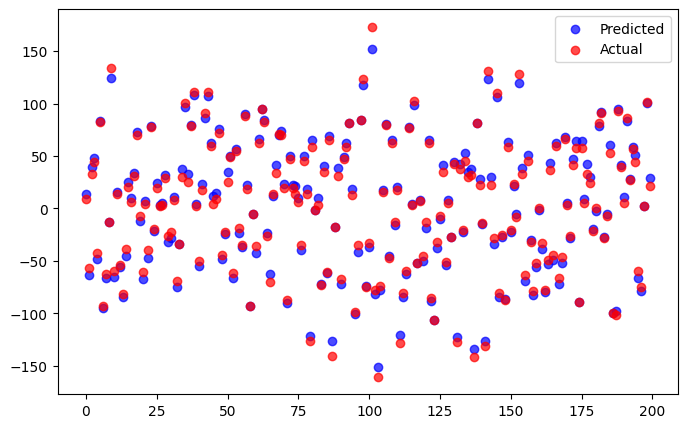

In [20]:
plt.figure(figsize=(8, 5))

plt.scatter(range(len(y_test)), y_pred, color='blue', label='Predicted', alpha=0.7)
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual', alpha=0.7)

plt.legend()
plt.show()

# The End